In [1]:
from SpecReduction import SpecFunctions as sf
import numpy as np
import pandas as pd
import scipy
import scipy.optimize as opt
from scipy.optimize import curve_fit
import specreduce
from specreduce import WavelengthCalibration1D as wav_cal
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from aquarel import load_theme
from astropy import units as u

In [2]:
theme = load_theme('arctic_dark')
theme.apply()

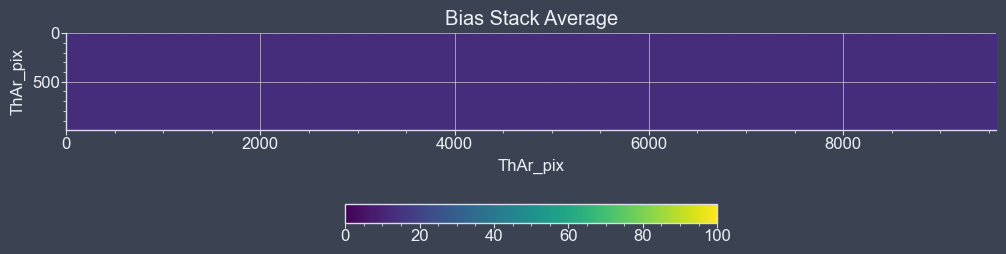

In [3]:
#median of bias frames stack
bias_path = f'Lab Day 20250729/Bias_729/2025-07-29_22_38_47Z/2025-07-29-2238_7-CapObj_'
bias_shape = fits.open(f'Lab Day 20250729/Bias_729/2025-07-29_22_38_47Z/2025-07-29-2238_7-CapObj_0067.FIT')[0].data.shape
bias_avg = sf.median_img(10, bias_path, bias_shape[0], bias_shape[1])

plt.figure(figsize = (12,12))
plt.imshow(bias_avg)
plt.title('Bias Stack Average')
plt.xlabel('ThAr_pix')
plt.ylabel('ThAr_pix')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

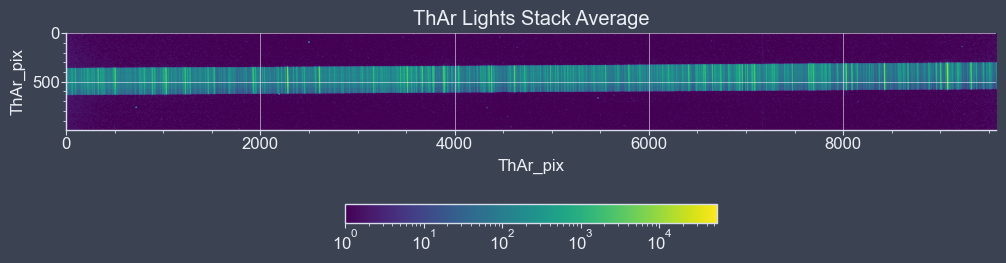

In [4]:
#median of ThAr lights stack
ThAr_lights_path = f'Lab Day 20250729/ThAr_2s_lights/2025-07-29-2227_6-CapObj_'
ThAr_lights_shape = fits.open(f'Lab Day 20250729/ThAr_2s_lights/2025-07-29-2227_6-CapObj_0010.FIT')[0].data.shape
ThAr_lights_avg = sf.median_img(10, ThAr_lights_path, ThAr_lights_shape[0], ThAr_lights_shape[1])

ThAr_lights_avg = ThAr_lights_avg - bias_avg

plt.figure(figsize = (12,12))
plt.imshow(ThAr_lights_avg, norm = 'log')
plt.title('ThAr Lights Stack Average')
plt.xlabel('ThAr_pix')
plt.ylabel('ThAr_pix')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

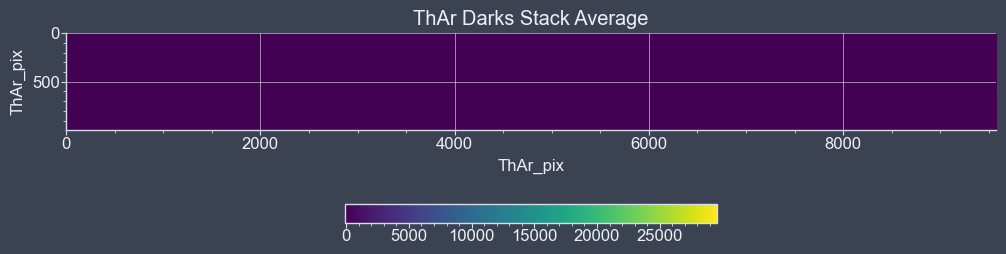

In [5]:
#median of ThAr darks stack
ThAr_darks_path = f'Lab Day 20250729/ThAr_2s_darks/2025-07-29-2233_2-CapObj_'
ThAr_darks_shape = fits.open(f'Lab Day 20250729/ThAr_2s_darks/2025-07-29-2233_2-CapObj_0028.FIT')[0].data.shape
ThAr_darks_avg = sf.median_img(10, ThAr_darks_path, ThAr_darks_shape[0], ThAr_darks_shape[1])

ThAr_darks_avg = ThAr_darks_avg - bias_avg

plt.figure(figsize = (12,12))
plt.imshow(ThAr_darks_avg)
plt.title('ThAr Darks Stack Average')
plt.xlabel('ThAr_pix')
plt.ylabel('ThAr_pix')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

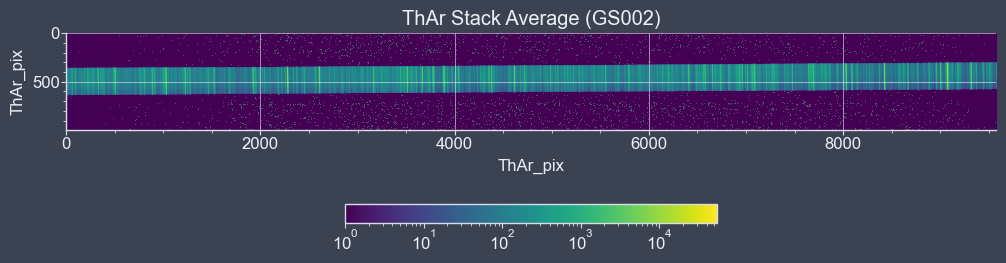

In [6]:
ThAr_subtracted = ThAr_lights_avg - ThAr_darks_avg

plt.figure(figsize = (12,12))
plt.imshow(ThAr_subtracted, norm = 'log')
plt.title('ThAr Stack Average (GS000)')
plt.xlabel('ThAr_pix')
plt.ylabel('ThAr_pix')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08, norm = 'log')
plt.show()

(1.0, 9066, 0.9781767663459401, 2281)
-0.3799959137743957


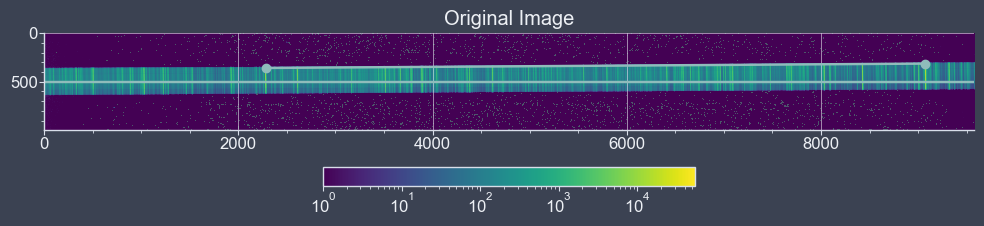

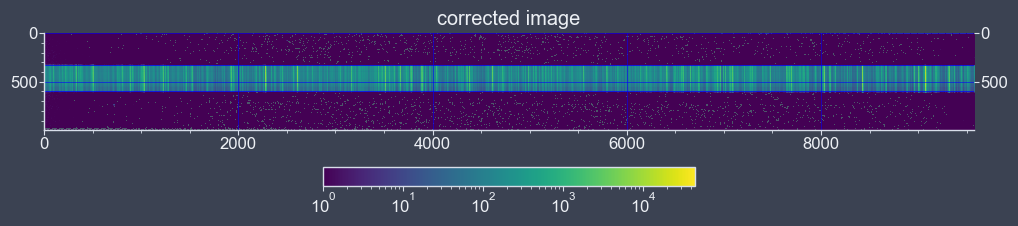

In [7]:
ThAr_corrected = sf.straight_spec(ThAr_subtracted)

In [8]:
ThAr_spec_norm = sf.make1D(ThAr_corrected)

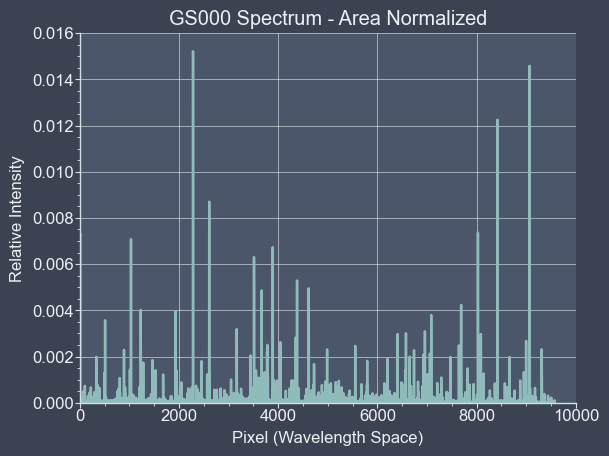

In [9]:
plt.plot(ThAr_spec_norm)
plt.title('GS000 Spectrum - Area Normalized')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(0,10000)
plt.ylim(0, .016)
plt.show()

In [11]:
ThAr_pix = np.linspace(0, ThAr_spec_norm.size - 1, ThAr_spec_norm.size)

GS000_data = {'pixel': ThAr_pix, 'intensity': ThAr_spec_norm}
GS000_df = pd.DataFrame(GS000_data)
GS000_df.to_csv('GS000.csv', index=False)